In [3]:
# !pip install kagglehub
# !pip install tensorflow

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cats-and-dogs-image-classification


In [6]:
!ls /kaggle/input/cats-and-dogs-image-classification

test  train


In [8]:
! ls /kaggle/input/cats-and-dogs-image-classification/test

cats  dogs


In [10]:
# Create an ImageDataGenerator with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)   # normalize 0-1
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Load training images
train_generator = train_datagen.flow_from_directory(
    path+'/train/',
    target_size=(150, 150),  # resize all images to 150x150
    batch_size=32,
    class_mode='binary'      # cats vs dogs (2 classes)
)

# Load test images
test_generator = test_datagen.flow_from_directory(
    path+'/test/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [12]:
# Check class indices
print("Class indices:", train_generator.class_indices)

Class indices: {'cats': 0, 'dogs': 1}


# Model Definiton of Layers

In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling Model

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training Model , Below and saving keras file

In [19]:
# 2. Train model
history = model.fit(
    train_generator,
    epochs=10,                     # you can increase if dataset is large
    validation_data=test_generator
)

# 3. Save trained model
model.save("cats_dogs_cnn.keras")
print("✅ Model saved as cats_dogs_cnn.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4691 - loss: 1.6187 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5502 - loss: 0.6796 - val_accuracy: 0.5357 - val_loss: 0.7000
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5984 - loss: 0.6816 - val_accuracy: 0.5571 - val_loss: 0.6889
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7066 - loss: 0.6115 - val_accuracy: 0.5786 - val_loss: 0.6681
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8038 - loss: 0.4972 - val_accuracy: 0.5857 - val_loss: 0.6804
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8772 - loss: 0.3320 - val_accuracy: 0.6571 - val_loss: 0.6989
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9085 - loss: 0.2670 - val_accuracy: 0.6286 - val_loss: 0.6806
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.9419 - loss: 0.1718 - val_accuracy: 0.6286 - val_loss:

In [21]:
# Load Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np


# 1. Load saved model
model = load_model("cats_dogs_cnn.keras")

# 2. Load an image for prediction
img_path = "dogs_test_image.jpeg"
img = image.load_img(img_path, target_size=(150, 150))  # same size as training

# 3. Convert image to array
img_array = image.img_to_array(img) / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# 4. Make prediction
prediction = model.predict(img_array)

prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


array([[0.76253855]], dtype=float32)

dogs_test_image.jpeg → 🐶 Dog (0.76)


array([[[220, 218, 217],
        [217, 215, 214],
        [212, 210, 209],
        ...,
        [216, 219, 223],
        [216, 219, 223],
        [215, 218, 222]],

       [[224, 222, 221],
        [221, 219, 218],
        [216, 214, 213],
        ...,
        [216, 219, 223],
        [215, 218, 222],
        [215, 218, 222]],

       [[231, 226, 227],
        [228, 223, 224],
        [224, 220, 219],
        ...,
        [215, 218, 222],
        [215, 218, 222],
        [214, 217, 221]],

       ...,

       [[193, 193, 199],
        [205, 205, 211],
        [214, 214, 220],
        ...,
        [191, 190, 194],
        [188, 187, 191],
        [186, 185, 189]],

       [[213, 213, 219],
        [211, 211, 217],
        [201, 201, 207],
        ...,
        [200, 199, 203],
        [198, 197, 201],
        [196, 195, 199]],

       [[203, 202, 206],
        [209, 208, 212],
        [198, 197, 201],
        ...,
        [206, 205, 209],
        [204, 203, 207],
        [202, 201, 205]]], dtype=uint8)
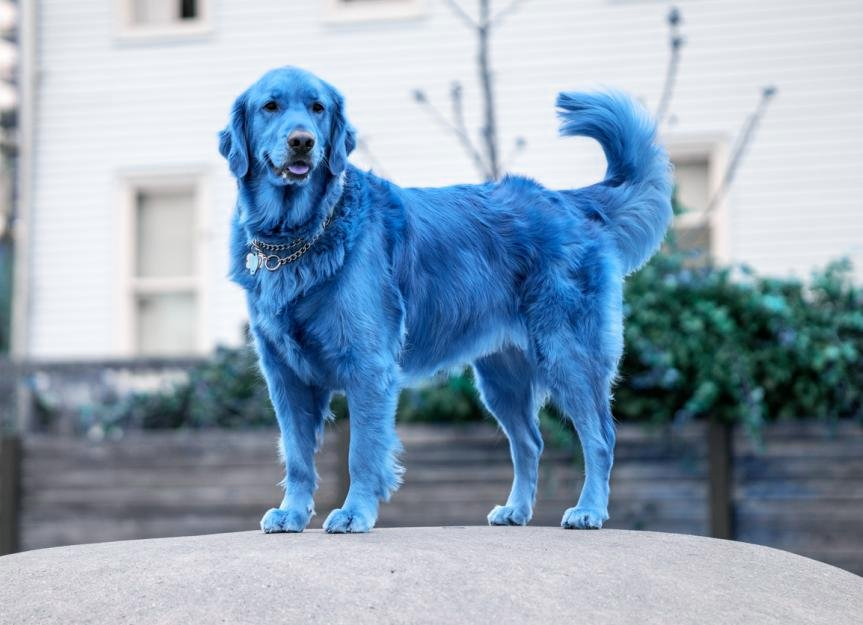

In [24]:
import cv2

img = cv2.imread(img_path)

# 5. Interpret result
if prediction[0][0] > 0.5:
    print(f"{img_path} → 🐶 Dog ({prediction[0][0]:.2f})")
else:
    print(f"{img_path} → 🐱 Cat ({1 - prediction[0][0]:.2f})")

img